In [3]:
import pandas as pd

Datensatz laden

In [4]:
df = pd.read_csv('diabetes.csv')

Logistic Regression

In [7]:
X = df.drop('class', axis=1)  # Features: alles außer 'class'
y = df['class'].apply(lambda x: 1 if x == 'tested_positive' else 0)  # Ziel: 0/1

In [10]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

Modell Evaluieren

In [11]:
print("Koeffizienten des Modells:", model.coef_)
print("Intercept des Modells:", model.intercept_)

Koeffizienten des Modells: [[ 1.22516387e-01  3.51112470e-02 -1.32987686e-02  7.83076076e-04
  -1.17400225e-03  8.96460243e-02  8.67924089e-01  1.49800088e-02]]
Intercept des Modells: [-8.36507711]


In [12]:
from sklearn.metrics import accuracy_score

Vorghersage und genauigkeit

In [13]:
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Genauigkeit des Modells:", accuracy)

Genauigkeit des Modells: 0.78125


Residuen visualisieren

In [14]:
residuals = y - y_pred

In [15]:
import matplotlib.pyplot as plt

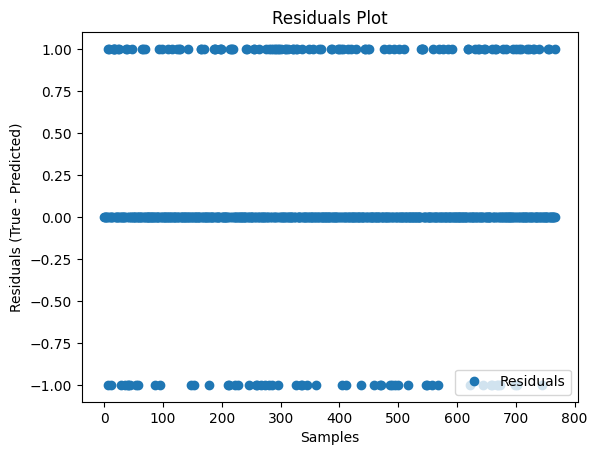

In [16]:
plt.plot(residuals.values, marker='o', linestyle='', label='Residuals')
plt.title('Residuals Plot')
plt.xlabel('Samples')
plt.ylabel('Residuals (True - Predicted)')
plt.legend()
plt.show()

0 → korrekt vorhergesagt

+1 → falsch negativ (Modell sagt 0, aber es war 1)

−1 → falsch positiv (Modell sagt 1, aber es war 0)

Modell trainieren

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7467532467532467


In [21]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Durchschnittliche Cross-Validation Genauigkeit:", cv_scores.mean())

Cross-Validation Scores: [0.77272727 0.74675325 0.75324675 0.81045752 0.77777778]
Durchschnittliche Cross-Validation Genauigkeit: 0.7721925133689839
